
# **Project Objectives:**

#The project's objective was to analyze air quality in Tamil Nadu by examining historical data, with a focus on SO2, NO2, and RSPM/PM10 levels. We implemented data preprocessing, visualization, and linear regression modeling. Example outputs include time series plots and predictive models.

#This analysis offers insights into trends, showing fluctuations in pollutant levels over time. The code aids in estimating air quality, providing valuable information for understanding and managing pollution in Tamil Nadu.


# **ANALYSIS**
# The analysis of air quality data in Tamil Nadu offers valuable insights into air pollution trends and pollution levels in the region in the following ways:

#**Temporal Trends:**
#By visualizing time series data for pollutants like SO2, NO2, and RSPM/PM10, the analysis reveals how pollution levels change over time. Patterns, fluctuations, and long-term trends become apparent, aiding in understanding the impact of various factors on air quality.

#**Spatial Variations:**
#Heatmaps and location-based visualizations show variations in pollutant levels across different monitoring stations in Tamil Nadu. This helps identify areas with consistently high or low pollution, which can inform policy decisions and resource allocation.

#**Statistical Summaries:**
#Summary statistics and box plots provide a comprehensive view of the distribution of pollutant concentrations. Mean, median, and standard deviation values, as well as potential outliers, offer insights into the central tendency and variability of air pollution levels.

#**Regression Modeling:**
#The linear regression model for estimating RSPM/PM10 levels based on SO2 and NO2 concentrations allows us to make predictions and understand how these key pollutants contribute to particulate matter in the air. This can be crucial for pollution control efforts.

#Overall, the analysis enables stakeholders, policymakers, and researchers to gain a deeper understanding of air pollution trends in Tamil Nadu. This understanding can drive informed decisions and interventions to improve air quality, protect public health, and mitigate environmental impacts.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Assuming your data is in a CSV file
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# **Data Preprocessing:**
 # We cleaned and structured the air quality dataset, handling missing values and data format conversions.

In [ ]:
# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check unique values in categorical columns
print(data['State'].unique())
print(data['City/Town/Village/Area'].unique())
# ... Repeat for other categorical columns


          Stn Code          SO2          NO2    RSPM/PM10  PM 2.5
count  2879.000000  2868.000000  2866.000000  2875.000000     0.0
mean    475.750261    11.503138    22.136776    62.494261     NaN
std     277.675577     5.051702     7.128694    31.368745     NaN
min      38.000000     2.000000     5.000000    12.000000     NaN
25%     238.000000     8.000000    17.000000    41.000000     NaN
50%     366.000000    12.000000    22.000000    55.000000     NaN
75%     764.000000    15.000000    25.000000    78.000000     NaN
max     773.000000    49.000000    71.000000   269.000000     NaN
Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5          

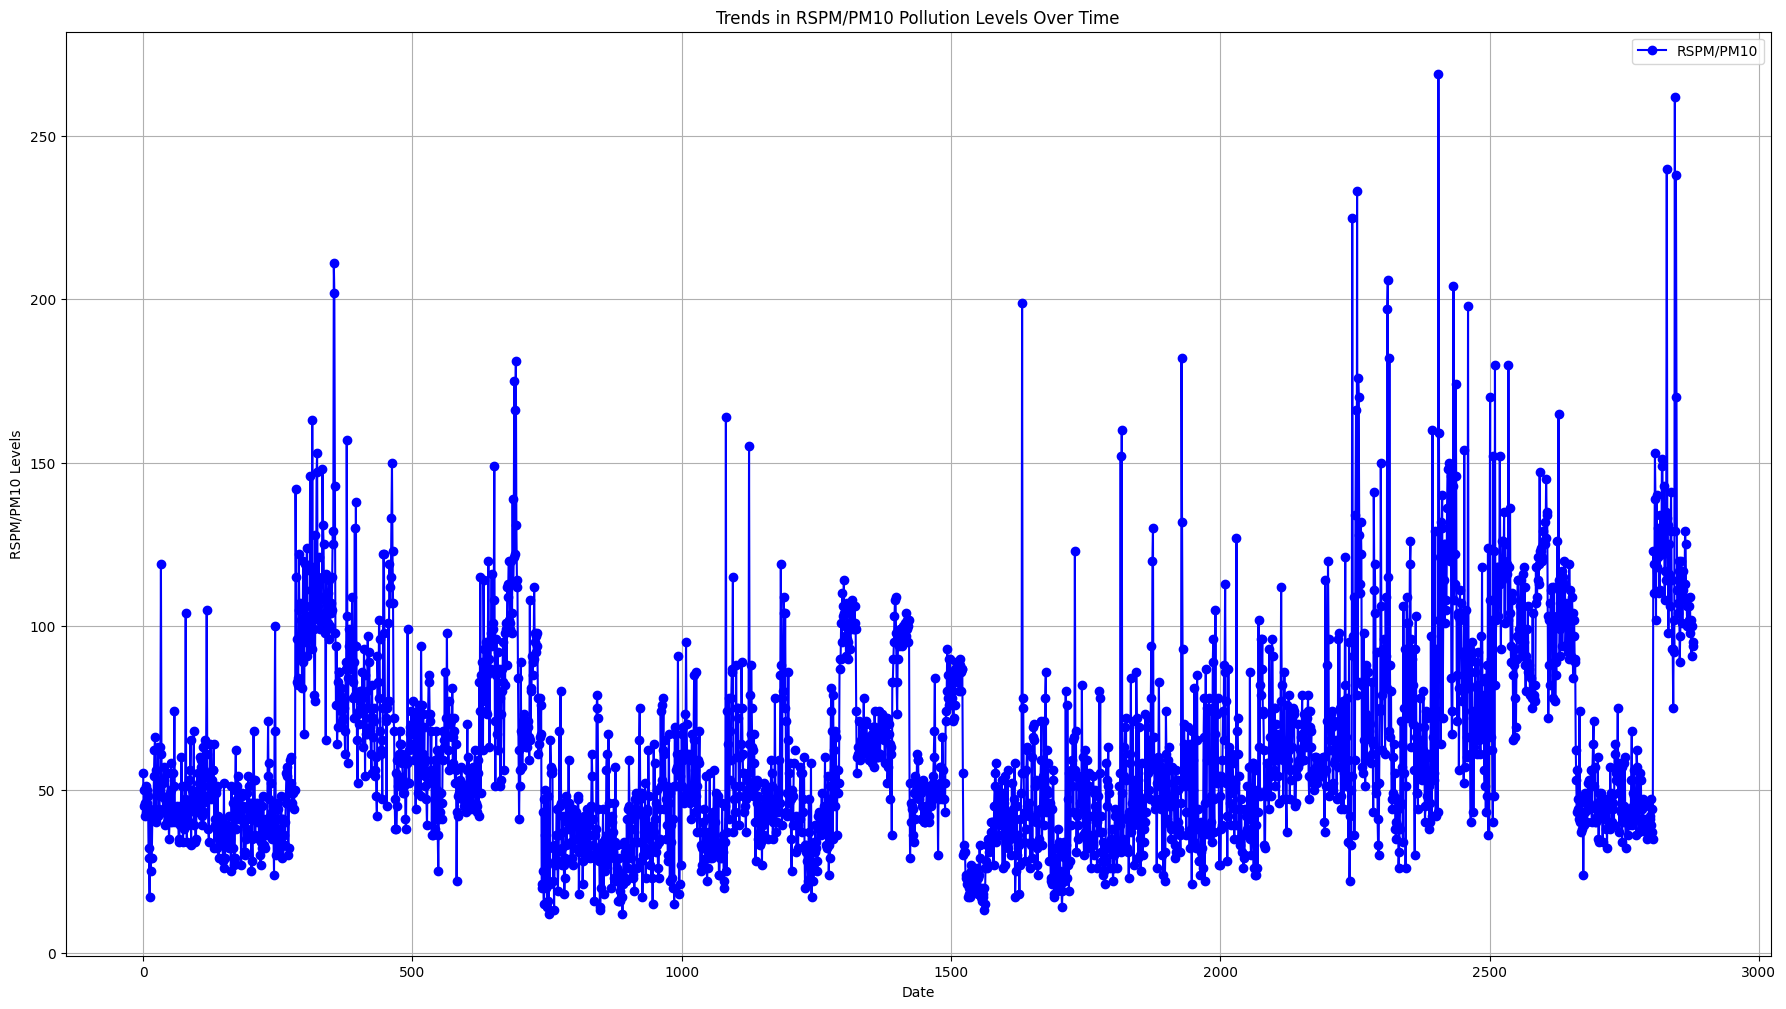

In [ ]:
import matplotlib.pyplot as plt
# Plot a line chart for RSPM/PM10 levels over time
plt.figure(figsize=(22,12))
plt.plot(data.index, data['RSPM/PM10'], marker='o', linestyle='-', color='b', label='RSPM/PM10')
plt.xlabel('Date')
plt.ylabel('RSPM/PM10 Levels')
plt.title('Trends in RSPM/PM10 Pollution Levels Over Time')
plt.grid(True)
plt.legend()
plt.show()

# **Groups the air quality data by date**
# Calculates the mean values for SO2, NO2, and RSPM/PM10, and plots the daily average air quality in Tamil Nadu. The line chart provides a clear visualization of how these pollutant concentrations vary over time, aiding in understanding daily air quality trends and fluctuations.

<ipython-input-5-4b27baf3318f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_mean = data.groupby('Sampling Date').mean()


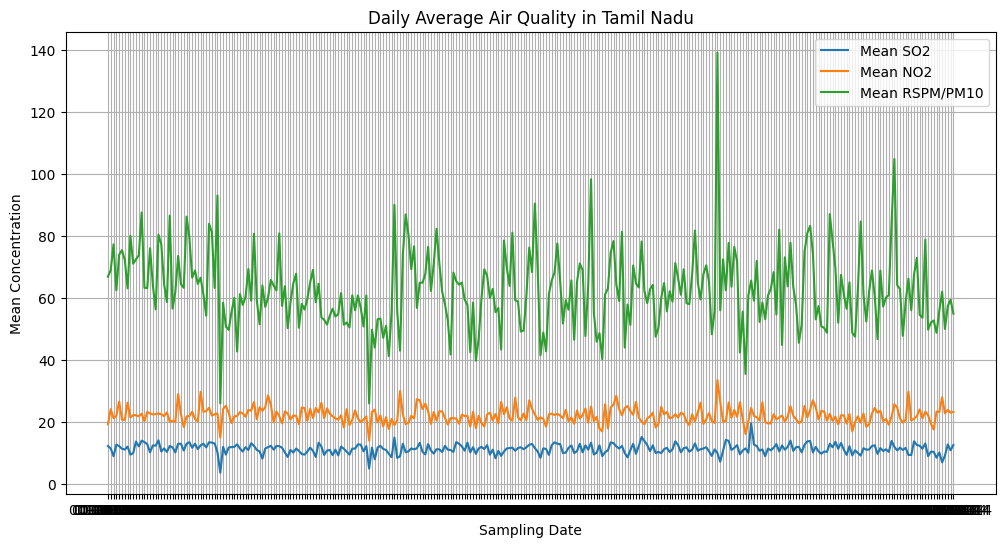

In [ ]:
# Group data by date and calculate mean values
daily_mean = data.groupby('Sampling Date').mean()

# Plot daily average air quality
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['SO2'], label='Mean SO2')
plt.plot(daily_mean.index, daily_mean['NO2'], label='Mean NO2')
plt.plot(daily_mean.index, daily_mean['RSPM/PM10'], label='Mean RSPM/PM10')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration')
plt.title('Daily Average Air Quality in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()

# **Concentrations of Sulfur Dioxide (SO2) and Nitrogen Dioxide (NO2)**

#Calculates the daily average concentrations of Sulfur Dioxide (SO2) and Nitrogen Dioxide (NO2) in Tamil Nadu. The resulting line chart provides insights into how these pollutants' levels change over time. It aids in visualizing and understanding the variations in SO2 and NO2 concentrations, essential for monitoring air quality in the region.

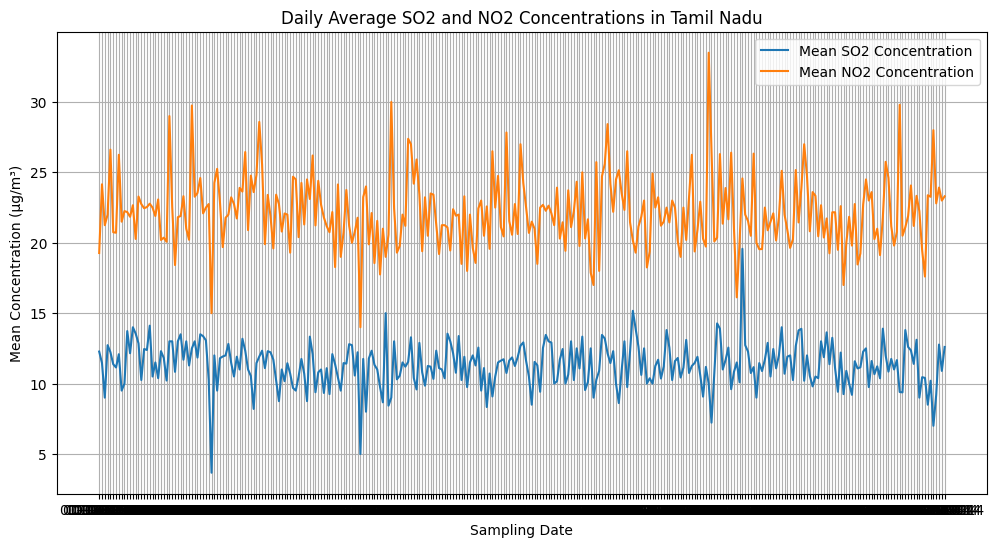

In [ ]:
# Calculate daily average SO2 and NO2 concentrations for all monitoring stations
daily_mean = data.groupby('Sampling Date')[['SO2', 'NO2']].mean()

# Plot daily average SO2 and NO2 concentrations
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['SO2'], label='Mean SO2 Concentration')
plt.plot(daily_mean.index, daily_mean['NO2'], label='Mean NO2 Concentration')
plt.xlabel('Sampling Date')
plt.ylabel('Mean Concentration (µg/m³)')  # Units may vary based on your data
plt.title('Daily Average SO2 and NO2 Concentrations in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()


# **Displays statistics for Sulfur Dioxide (SO2) and Nitrogen Dioxide (NO2) concentrations**

 # computes and displays statistics for Sulfur Dioxide (SO2) and Nitrogen Dioxide (NO2) concentrations. It generates two box plots, one for SO2 and the other for NO2. These plots help visualize the distribution of concentration values, showing the central tendency, spread, and potential outliers in the data, aiding in the identification of extreme values and data variability.

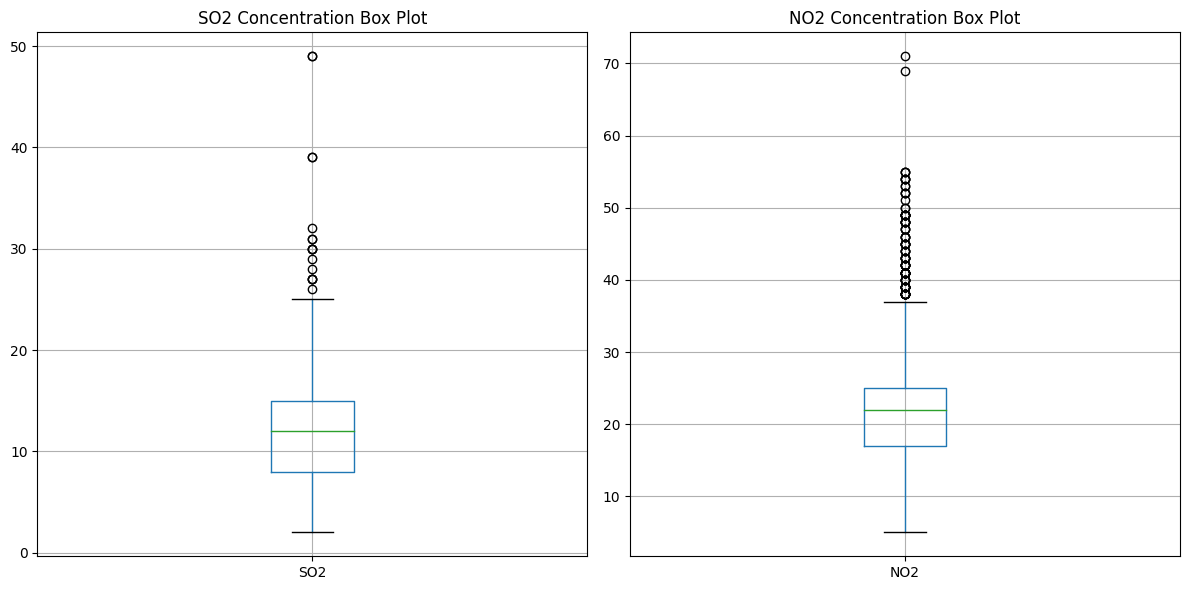

In [ ]:
# Summary statistics
so2_stats = data['SO2'].describe()
no2_stats = data['NO2'].describe()

# Box plots to visualize the distribution and identify outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data.boxplot(column='SO2')
plt.title('SO2 Concentration Box Plot')

plt.subplot(1, 2, 2)
data.boxplot(column='NO2')
plt.title('NO2 Concentration Box Plot')

plt.tight_layout()
plt.show()

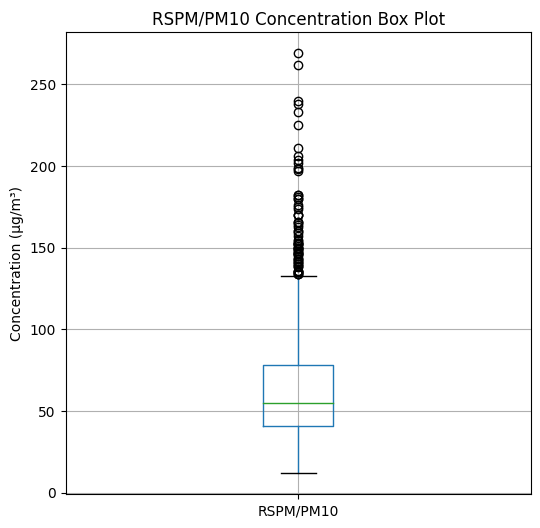

In [ ]:
# Summary statistics
rspm_pm10_stats = data['RSPM/PM10'].describe()

# Box plot to visualize the distribution and identify outliers
plt.figure(figsize=(6, 6))
data.boxplot(column='RSPM/PM10')
plt.title('RSPM/PM10 Concentration Box Plot')
plt.ylabel('Concentration (µg/m³)')  # Units may vary based on your data
plt.grid(True)
plt.show()


<ipython-input-9-8fdd52923255>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])


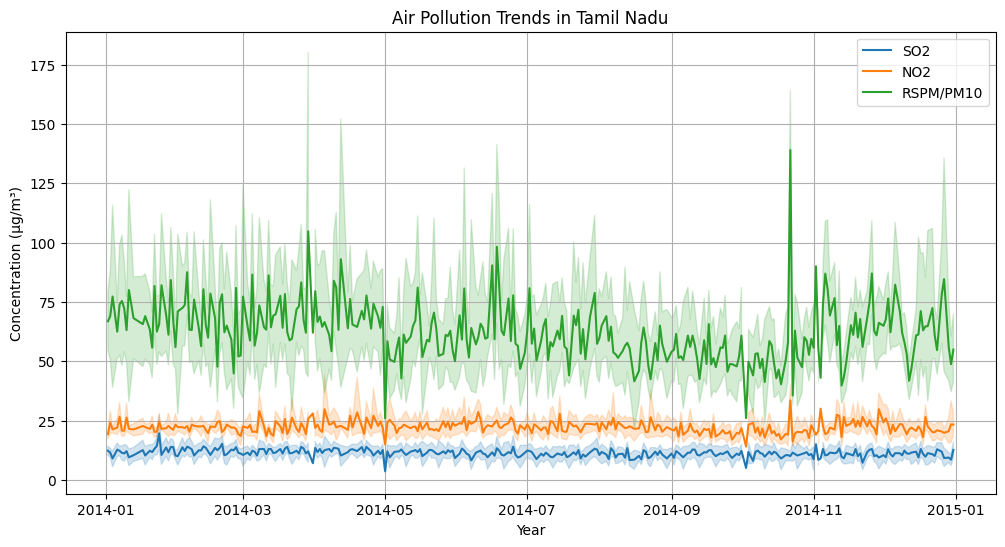

In [ ]:
import seaborn as sns

# Preprocess the data
# - Convert the 'Sampling Date' column to datetime format
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
# - Filter data for Tamil Nadu
tn_data = data[data['State'] == 'Tamil Nadu']

# Visualize trends in air pollution over time
plt.figure(figsize=(12, 6))

# Plot time series of SO2, NO2, and RSPM/PM10 concentrations
for pollutant in ['SO2', 'NO2', 'RSPM/PM10']:
    sns.lineplot(data=tn_data, x='Sampling Date', y=pollutant, label=pollutant)

plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.title('Air Pollution Trends in Tamil Nadu')
plt.legend()
plt.grid(True)
plt.show()

# **Data Visualization:**
# We used Matplotlib and Seaborn to create visualizations such as time series plots to explore pollutant trends.

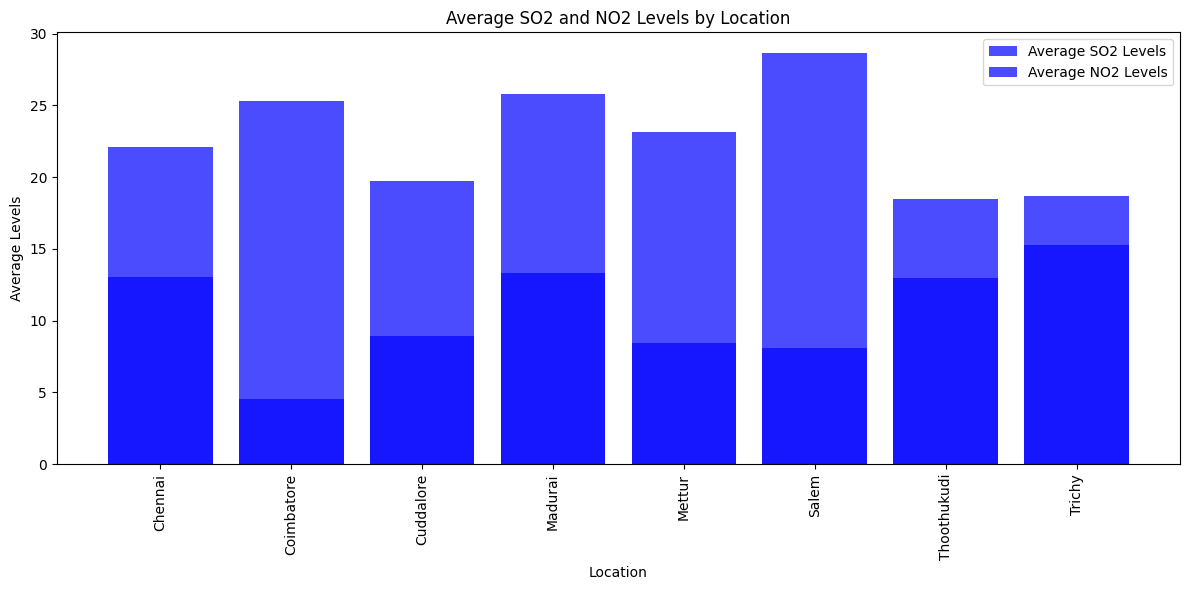

In [ ]:
import matplotlib.pyplot as plt

avg_so2_no2_by_location = data.groupby('City/Town/Village/Area')[['SO2', 'NO2']].mean().reset_index()

# Create a bar chart for average SO2 levels by location
plt.figure(figsize=(12, 6))
plt.bar(avg_so2_no2_by_location['City/Town/Village/Area'], avg_so2_no2_by_location['SO2'], label='Average SO2 Levels', alpha=0.7, color='b')

# Create a bar chart for average NO2 levels by location
plt.bar(avg_so2_no2_by_location['City/Town/Village/Area'], avg_so2_no2_by_location['NO2'], label='Average NO2 Levels', alpha=0.7, color='b')

plt.xlabel('Location')
plt.ylabel('Average Levels')
plt.title('Average SO2 and NO2 Levels by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

Mean Squared Error: 835.4788249190386
R-squared (Coefficient of Determination): 0.20658507746336507


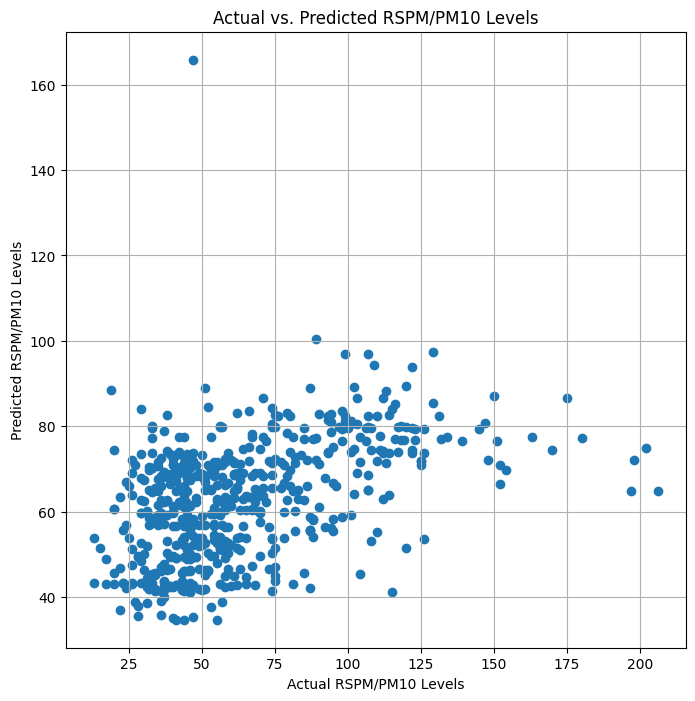

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data and select relevant columns
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
tn_data = data[data['State'] == 'Tamil Nadu']
selected_columns = ['SO2', 'NO2', 'RSPM/PM10']
tn_data = tn_data[selected_columns].dropna()  # Remove rows with missing values

# Split the data into training and testing sets
X = tn_data[['SO2', 'NO2']]
y = tn_data['RSPM/PM10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (Coefficient of Determination): {r2}')

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual RSPM/PM10 Levels')
plt.ylabel('Predicted RSPM/PM10 Levels')
plt.title('Actual vs. Predicted RSPM/PM10 Levels')
plt.grid(True)
plt.show()


In [ ]:
!pip install folium geopandas

In [ ]:
!pip install gmaps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.0 MB/s eta 0:00:00
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076086 sha256=40b7725c2867fe885f2fe0fd33fff84621eb01e27185d11647a72f1cab3cc5a8
  Stored in directory: /root/.cache/pip/wheels/b3/c2/dc/48b3ef16c2184dae51a003f17eb5d065bbbf1af3437d9f14e3
Successfully built gmaps


#In the Air Quality Analysis, incorporating Google Maps (GMap) can visually display pollution hotspots, helping users pinpoint areas with higher pollution levels. This feature enhances spatial understanding and facilitates informed decisions for better air quality management in Tamil Nadu.

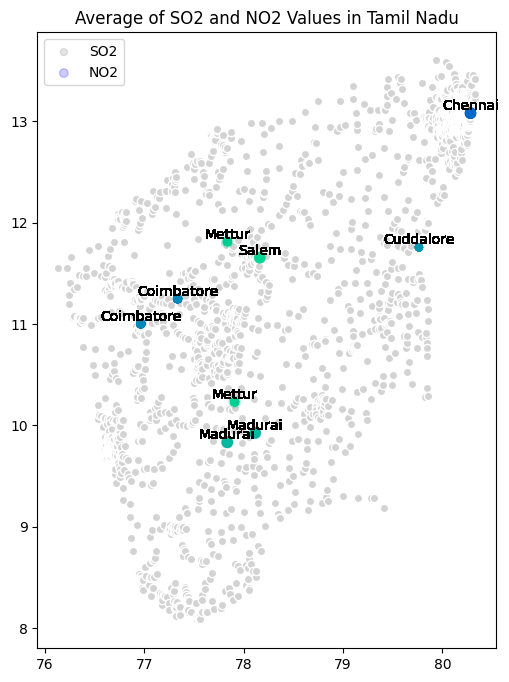

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load geographic boundary data for Tamil Nadu (replace 'tamil_nadu_location.shp' with the actual file path)
tamil_nadu_boundary = gpd.read_file('/content/tamil_nadu_location.shp', encoding='utf-8')


# Merge your data with the Tamil Nadu boundary data based on a common identifier (e.g., location name)
merged_data = tamil_nadu_boundary.merge(data, left_on='NAME', right_on='City/Town/Village/Area', how='right')

# Create a map with the Tamil Nadu boundary data
ax = tamil_nadu_boundary.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the locations and values on the map
merged_data.plot(ax=ax, markersize=merged_data['SO2'], alpha=0.1, legend=True, cmap='gist_heat', label = "SO2")
merged_data.plot(ax=ax, markersize=merged_data['NO2'], alpha=0.2, legend=True, cmap='winter', label = "NO2")

# Add place names as labels to the points on the map
for x, y, label in zip(merged_data.geometry.x, merged_data.geometry.y, merged_data['City/Town/Village/Area']):
   if not pd.isna(x) and not pd.isna(y):
        plt.annotate(label, (x, y), fontsize=10, ha='center', va='bottom')


plt.title('Average of SO2 and NO2 Values in Tamil Nadu')
ax.legend()
plt.show()

# **Linear Regression Modeling:**
# We employed a simple linear regression model to estimate RSPM/PM10 levels based on SO2 and NO2 concentrations
# **Predict Respirable Suspended Particulate Matter (RSPM/PM10) levels**

# The segment demonstrates how to use a linear regression model to predict Respirable Suspended Particulate Matter (RSPM/PM10) levels based on Sulfur Dioxide (SO2) and Nitrogen Dioxide (NO2) levels. It loads and preprocesses the data, trains a linear regression model, and then predicts RSPM/PM10 levels for new data with specified SO2 and NO2 values.

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your air quality data into a Pandas DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# Preprocess the data and select relevant columns
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
tn_data = data[data['State'] == 'Tamil Nadu']
selected_columns = ['SO2', 'NO2', 'RSPM/PM10']
tn_data = tn_data[selected_columns].dropna()  # Remove rows with missing values

# Separate the features (SO2 and NO2) from the target (RSPM/PM10)
X = tn_data[['SO2', 'NO2']]
y = tn_data['RSPM/PM10']

# Create and train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Now, you can use the trained model to make predictions for new data
# Replace 'new_data' with the values of SO2 and NO2 you want to predict RSPM/PM10 for
new_data = [[100, 200]]  # Example values for SO2 and NO2
predicted_rspm_pm10 = model.predict(new_data)

print(f'Predicted RSPM/PM10: {predicted_rspm_pm10[0]} µg/m³')

Predicted RSPM/PM10: 331.29760210728915 µg/m³


<ipython-input-27-3d609d8cf440>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Heatmap to visualize pollutant levels (RSPM/PM10)**

# To loads an air quality dataset and creates a heatmap to visualize pollutant levels (RSPM/PM10) by location and time in Tamil Nadu. It uses the Seaborn library for heatmap creation. The heatmap provides a graphical representation of air quality trends across different monitoring locations over time, aiding in identifying variations and hotspots in pollution levels.

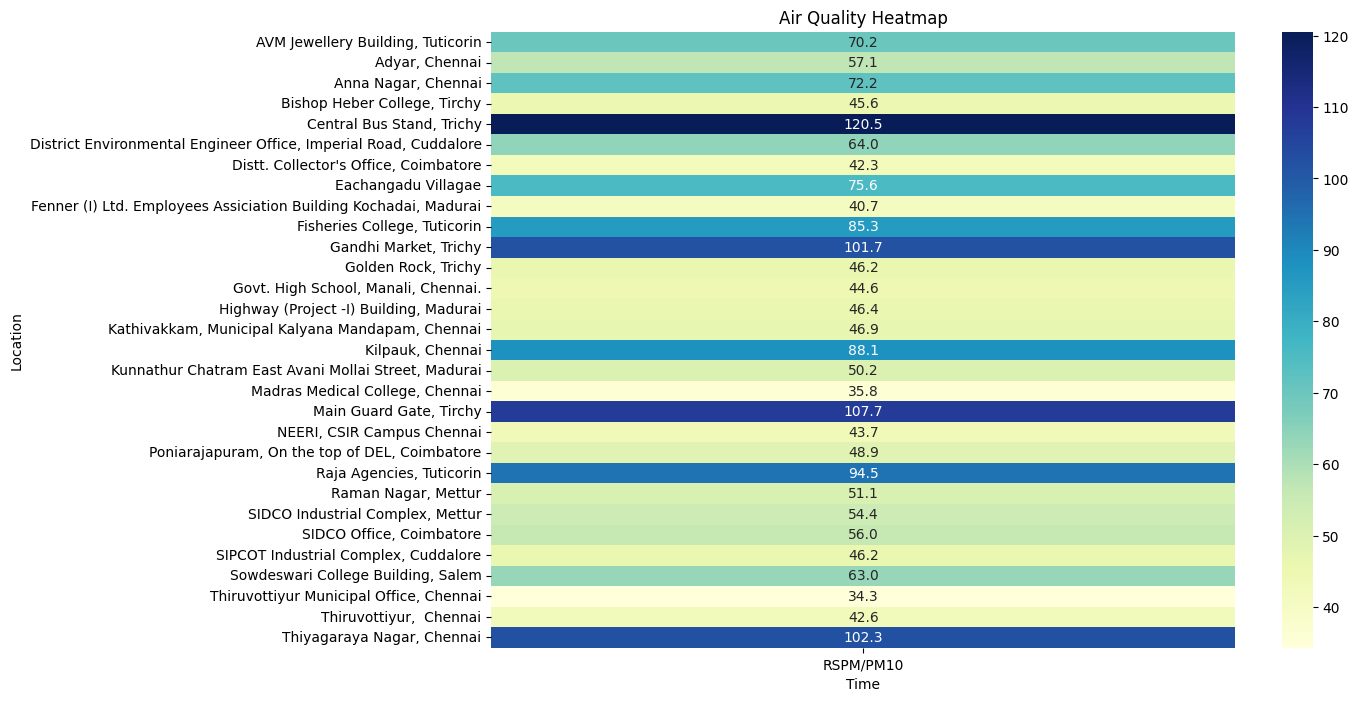

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your air quality dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# Select the relevant columns for the heatmap (e.g., pollutant levels by location and time)
# Replace 'Pollutant', 'Location', and 'Time' with your column names
data = df.pivot_table(index='Location of Monitoring Station', values='RSPM/PM10')

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(data, cmap='YlGnBu', annot=True, fmt=".1f")

# Customize the heatmap labels and title
plt.xlabel('Time')
plt.ylabel('Location')
plt.title('Air Quality Heatmap')

# Display the heatmap
plt.show()

In [ ]:
import pandas as pd

# Load your CSV dataset into a DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# Group the data by the 'Region' column and calculate the mean for each group
grouped = data.groupby('City/Town/Village/Area')[['SO2', 'NO2', 'RSPM/PM10']].mean()

# Display the calculated averages
print(grouped)

                              SO2        NO2  RSPM/PM10
City/Town/Village/Area                                 
Chennai                 13.014042  22.088442  58.998000
Coimbatore               4.541096  25.325342  49.217241
Cuddalore                8.965986  19.710884  61.881757
Madurai                 13.319728  25.768707  45.724490
Mettur                   8.429268  23.185366  52.721951
Salem                    8.114504  28.664122  62.954198
Thoothukudi             12.989691  18.512027  83.458904
Trichy                  15.293956  18.695055  85.054496


In [ ]:
import pandas as pd

# Load your CSV dataset into a DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# Group the data by the 'Region' column and calculate the mean for each group
grouped = data.groupby('Location of Monitoring Station')[['SO2', 'NO2', 'RSPM/PM10']].mean()

# Display the calculated averages
print(grouped)

                                                          SO2        NO2  \
Location of Monitoring Station                                             
AVM Jewellery Building, Tuticorin                    9.302083  12.697917   
Adyar, Chennai                                      13.252174  18.965217   
Anna Nagar, Chennai                                 13.873874  20.754545   
Bishop Heber College, Tirchy                        11.800000  14.942857   
Central Bus Stand, Trichy                           18.013333  21.506667   
District Environmental Engineer Office, Imperia...   8.101010  19.151515   
Distt. Collector's Office, Coimbatore                4.554348  25.793478   
Eachangadu Villagae                                 11.916667  22.395833   
Fenner (I) Ltd. Employees Assiciation Building ...  13.643564  27.198020   
Fisheries College, Tuticorin                        14.526882  20.204301   
Gandhi Market, Trichy                               17.148649  20.797297   
Golden Rock,

In [ ]:
import pandas as pd

# Load your CSV dataset into a DataFrame
data = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv')

# Calculate the average pollution level for each area
data['Average_Pollution'] = data[['SO2', 'NO2', 'RSPM/PM10']].mean(axis=1)

# Sort the areas in increasing order of average pollution levels
sorted_data = data.sort_values(by='Average_Pollution',ascending = False)

# Display the sorted DataFrame
print(sorted_data[['City/Town/Village/Area', 'Average_Pollution']])


     City/Town/Village/Area  Average_Pollution
354                 Chennai         113.500000
2636                 Trichy         107.000000
438                 Chennai         102.000000
2844                 Trichy         100.333333
2846                 Trichy         100.333333
...                     ...                ...
1556              Cuddalore          11.333333
849                 Chennai          11.333333
1563              Cuddalore          11.333333
1557              Cuddalore          11.000000
1562              Cuddalore          10.666667

[2879 rows x 2 columns]
